c

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Convert categorical variables to numeric if necessary
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Split the data into training and testing sets
train_data, test_data = train_test_split(numeric_data, test_size=0.3, random_state=42, stratify=numeric_data['dastgah'])

X_train = train_data.drop('dastgah', axis=1)
y_train = train_data['dastgah']
X_test = test_data.drop('dastgah', axis=1)
y_test = test_data['dastgah']


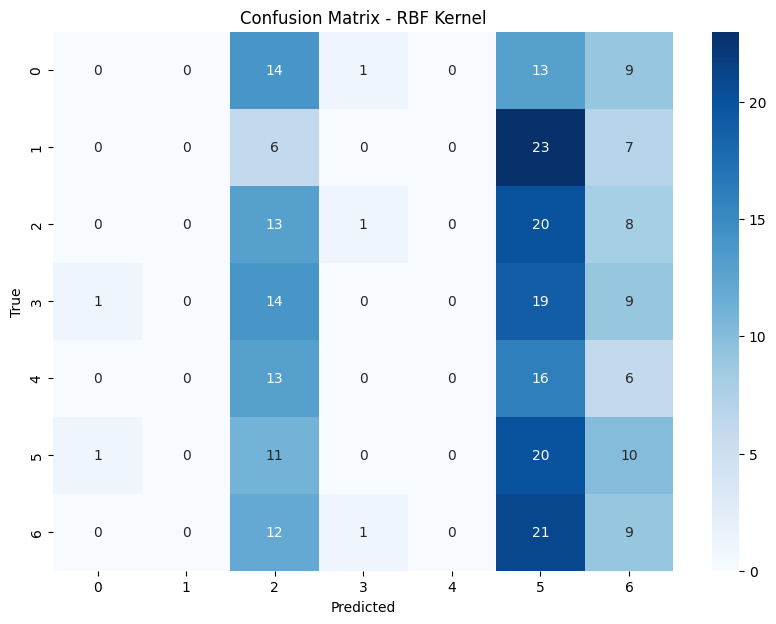

Classification Report - RBF Kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        36
           2       0.16      0.31      0.21        42
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        35
           5       0.15      0.48      0.23        42
           6       0.16      0.21      0.18        43

    accuracy                           0.15       278
   macro avg       0.07      0.14      0.09       278
weighted avg       0.07      0.15      0.09       278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', probability=True)
rbf_svm.fit(X_train, y_train)

# Predict on test data
y_pred_rbf = rbf_svm.predict(X_test)

# Compute confusion matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Fit LabelEncoder on training labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Get class names from LabelEncoder and convert to strings
class_names = list(map(str, label_encoder.classes_))

# Classification report
print("Classification Report - RBF Kernel")
print(classification_report(y_test, y_pred_rbf, target_names=class_names))


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Convert categorical variables to numeric if necessary
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Split the data into training and testing sets
train_data, test_data = train_test_split(numeric_data, test_size=0.3, random_state=42, stratify=numeric_data['dastgah'])

X_train = train_data.drop('dastgah', axis=1)
y_train = train_data['dastgah']
X_test = test_data.drop('dastgah', axis=1)
y_test = test_data['dastgah']


In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the model
svc = SVC()

# Initialize GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_svc = grid_search.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

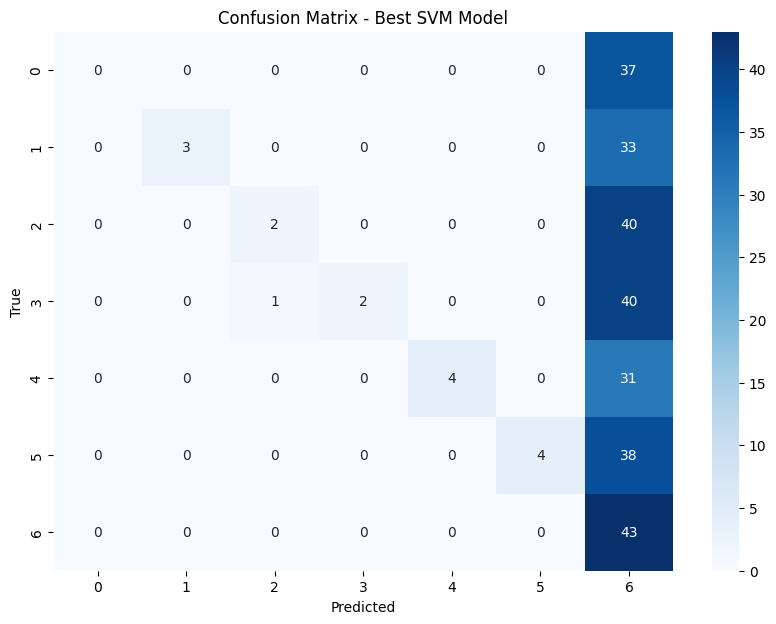

Classification Report - Best SVM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       1.00      0.08      0.15        36
           2       0.67      0.05      0.09        42
           3       1.00      0.05      0.09        43
           4       1.00      0.11      0.21        35
           5       1.00      0.10      0.17        42
           6       0.16      1.00      0.28        43

    accuracy                           0.21       278
   macro avg       0.69      0.20      0.14       278
weighted avg       0.69      0.21      0.14       278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_svc is the best model obtained after tuning

# Predict on test data with the best model
y_pred_best = best_svc.predict(X_test)

# Compute confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best SVM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Fit LabelEncoder on training labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Get class names from LabelEncoder and convert to strings
class_names = list(map(str, label_encoder.classes_))

# Classification report
print("Classification Report - Best SVM Model")
print(classification_report(y_test, y_pred_best, target_names=class_names))


d

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Convert categorical variables to numeric if necessary
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Split the data into training and testing sets
train_data, test_data = train_test_split(numeric_data, test_size=0.3, random_state=42, stratify=numeric_data['dastgah'])

X_train = train_data.drop('dastgah', axis=1)
y_train = train_data['dastgah']
X_test = test_data.drop('dastgah', axis=1)
y_test = test_data['dastgah']


In [12]:
# Reduce dimensions with PCA to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reduce dimensions with LDA to 3 components
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


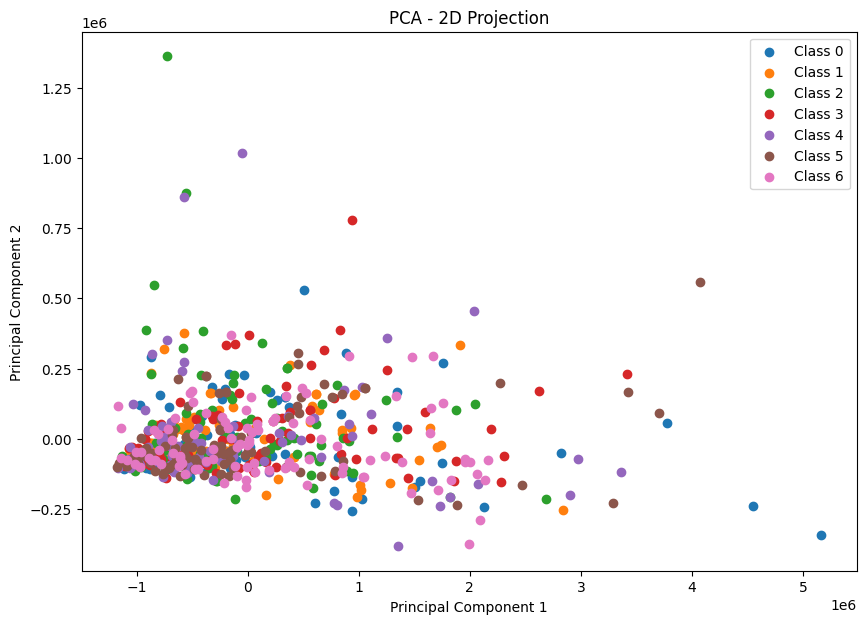

In [13]:
plt.figure(figsize=(10, 7))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Class {label}')
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


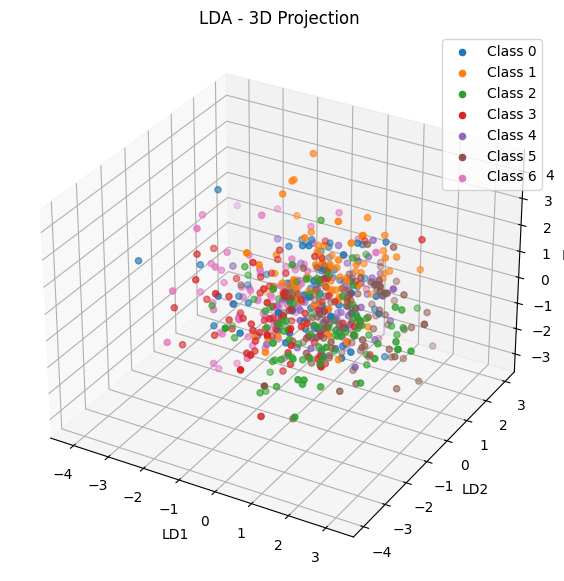

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y_train):
    ax.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], X_train_lda[y_train == label, 2], label=f'Class {label}')
ax.set_title('LDA - 3D Projection')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
plt.legend()
plt.show()


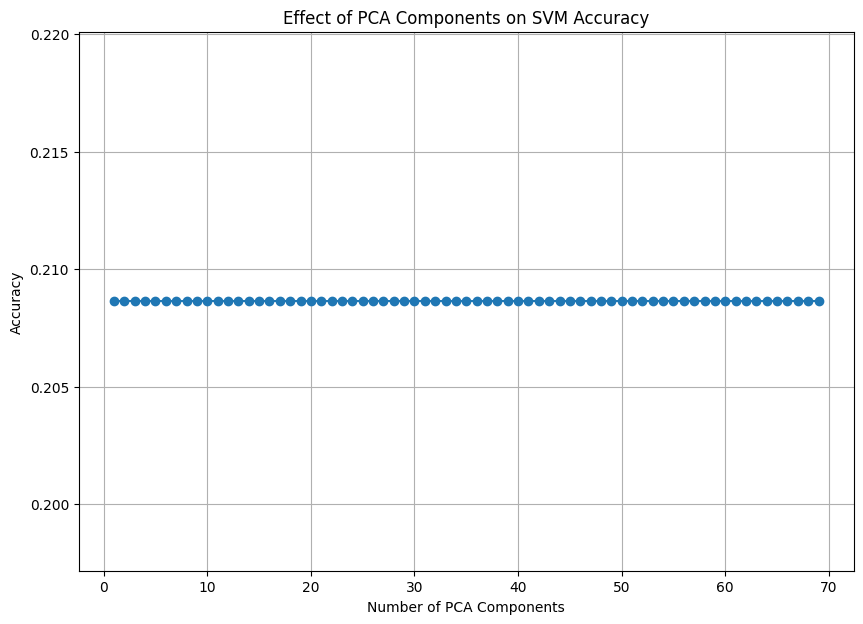

In [15]:
accuracy_scores = []
components_range = range(1, X_train.shape[1] + 1)

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM with RBF kernel
    svc = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
    svc.fit(X_train_pca, y_train)
    y_pred = svc.predict(X_test_pca)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(components_range, accuracy_scores, marker='o')
plt.title('Effect of PCA Components on SVM Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


e

In [19]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Convert categorical variables to numeric if necessary
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Identify and convert non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values created by coercion
data = data.dropna()

# Remove non-numeric columns
numeric_data = data.drop(['dastgah'], axis=1)


In [20]:
# Function to extract frequency features
def extract_frequency_features(row):
    features = np.abs(np.fft.fft(row))
    return features[:len(features) // 2]  # Keep only the first half (positive frequencies)

# Apply the extraction to the dataset
frequency_features = numeric_data.apply(extract_frequency_features, axis=1)
frequency_features_df = pd.DataFrame(frequency_features.tolist())

# Add the labels back
frequency_features_df['dastgah'] = data['dastgah']


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Convert categorical variables to numeric if necessary
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Identify and convert non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values created by coercion
data = data.dropna()

# Check if the data is now fully numeric
print(data.info())

# Remove non-numeric columns
numeric_data = data.drop(['dastgah'], axis=1)


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 72 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    0 non-null      float64
 1   dastgah                 0 non-null      int64  
 2   instrument              0 non-null      float64
 3   zero_corssing           0 non-null      int64  
 4   spectral_centroid_mean  0 non-null      float64
 5   spectral_centroid_var   0 non-null      float64
 6   spectral_rolloff_mean   0 non-null      float64
 7   spectral_rolloff_var    0 non-null      float64
 8   chroma_1_mean           0 non-null      float64
 9   chroma_2_mean           0 non-null      float64
 10  chroma_3_mean           0 non-null      float64
 11  chroma_4_mean           0 non-null      float64
 12  chroma_5_mean           0 non-null      float64
 13  chroma_6_mean           0 non-null      float64
 14  chroma_7_mean           0 non-null      float64
 15  chroma

In [24]:
# Function to extract frequency features
def extract_frequency_features(row):
    features = np.abs(np.fft.fft(row))
    return features[:len(features) // 2]  # Keep only the first half (positive frequencies)

# Apply the extraction to the dataset
frequency_features = numeric_data.apply(extract_frequency_features, axis=1)
frequency_features_df = pd.DataFrame(frequency_features.tolist())

# Check the result of the feature extraction
print(frequency_features_df.head())

# Add the labels back
frequency_features_df['dastgah'] = data['dastgah']


Empty DataFrame
Columns: []
Index: []


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert data to PyTorch tensors
X = frequency_features_df.drop('dastgah', axis=1).values
y = frequency_features_df['dastgah'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Initialize the model, loss function and optimizer
input_dim = X_train_tensor.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, _ in train_loader:
        optimizer.zero_grad()
        encoded, decoded = model(inputs)
        loss = criterion(decoded, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, _ in test_loader:
            encoded, decoded = model(inputs)
            loss = criterion(decoded, inputs)
            val_loss += loss.item()
    val_loss /= len(test_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.